In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
data = pd.read_csv("kor.txt",names=['src','tar','etc'],sep='\t')

In [3]:
data.head()

,src,tar,etc
0,Go.,가.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Hi.,안녕.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
2,Run!,뛰어!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3,Run.,뛰어.,CC-BY 2.0 (France) Attribution: tatoeba.org #4...
4,Who?,누구?,CC-BY 2.0 (France) Attribution: tatoeba.org #2...


In [4]:
print('데이터 행의 개수 : {}'.format(len(data)))

데이터 행의 개수 : 3621


In [5]:
print('데이터의 Null 유무 : '+str(data.isnull().values.any()))

데이터의 Null 유무 : False


In [6]:
!pip install konlpy

In [0]:
from konlpy.tag import Kkma

kkma = Kkma()
kor_target = []
for i in data.tar:
    x = kkma.morphs(i)
    kor_target.append('\t ' + ' '.join(x) + ' \n')

In [0]:
src_tokenizer = Tokenizer(lower=True)
src_tokenizer.fit_on_texts(data.src)
tar_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~')
tar_tokenizer.fit_on_texts(kor_target)

In [9]:
src_to_index = src_tokenizer.word_index
print(src_to_index)

{'tom': 1, 'i': 2, 'to': 3, 'you': 4, 'is': 5, 'a': 6, 'the': 7, 'that': 8, 'in': 9, 'do': 10, 'was': 11, 'this': 12, "i'm": 13, 'me': 14, "don't": 15, 'my': 16, 'have': 17, 'of': 18, 'be': 19, 'are': 20, 'it': 21, 'he': 22, 'think': 23, 'like': 24, 'your': 25, 'for': 26, 'french': 27, 'his': 28, 'there': 29, 'want': 30, 'not': 31, 'how': 32, 'we': 33, 'mary': 34, 'what': 35, 'and': 36, 'can': 37, 'know': 38, 'very': 39, 'with': 40, "it's": 41, 'has': 42, 'at': 43, 'been': 44, 'as': 45, 'go': 46, 'here': 47, "didn't": 48, 'going': 49, 'really': 50, 'did': 51, 'why': 52, 'on': 53, 'she': 54, 'too': 55, 'all': 56, 'time': 57, "isn't": 58, 'ever': 59, 'tell': 60, 'they': 61, "can't": 62, "that's": 63, 'would': 64, 'help': 65, 'no': 66, 'still': 67, 'please': 68, 'if': 69, 'sorry': 70, 'something': 71, 'so': 72, "doesn't": 73, 'had': 74, 'from': 75, 'one': 76, 'keep': 77, "tom's": 78, 'will': 79, 'hard': 80, 'when': 81, "you're": 82, 'old': 83, 'school': 84, 'more': 85, 'us': 86, 'come': 8

In [10]:
tar_to_index = tar_tokenizer.word_index
print(tar_to_index)

{'\t': 1, '\n': 2, '어': 3, '하': 4, '이': 5, '은': 6, '는': 7, '톰': 8, '었': 9, '을': 10, 'ㄴ': 11, '있': 12, '에': 13, '가': 14, '아': 15, '를': 16, '고': 17, '나': 18, '야': 19, '다': 20, 'ㄹ': 21, '것': 22, '지': 23, '그': 24, '았': 25, '않': 26, '낳': 27, '의': 28, '우리': 29, '사람': 30, '게': 31, '수': 32, '거': 33, '들': 34, '네': 35, '되': 36, '알': 37, '없': 38, '도': 39, '내': 40, '같': 41, '주': 42, '보': 43, '너': 44, '싶': 45, '에서': 46, '말하': 47, '로': 48, '건': 49, '메리': 50, '한테': 51, '안': 52, '좋아하': 53, '프랑스어': 54, '좋': 55, '더': 56, '생각': 57, '내가': 58, '말': 59, '겠': 60, '어요': 61, '오': 62, '에게': 63, '이것': 64, '어야': 65, '으로': 66, '그것': 67, '배우': 68, '기': 69, '네가': 70, '너무': 71, '좀': 72, '니': 73, '일': 74, '아직': 75, '어서': 76, '여기': 77, 'ㄴ다': 78, '모르': 79, '적': 80, '왜': 81, '모두': 82, '살': 83, '보이': 84, '시': 85, '정말': 86, 'ㅂ니다': 87, '서': 88, '세요': 89, '아니': 90, '쓰': 91, '는지': 92, '마': 93, '과': 94, '줄': 95, '듣': 96, '고양이': 97, '다고': 98, '먹': 99, '자': 100, '느': 101, '보다': 102, '시간': 103, '한': 104, '때': 105, '공부': 106, '있었'

In [11]:
vocab_size = len(src_tokenizer.word_index) + 1
tar_size = len(tar_tokenizer.word_index) + 1
print("SRC 단어 집합의 크기 : {}".format(vocab_size))
print("TAR 단어 집합의 크기 : {}".format(tar_size))

SRC 단어 집합의 크기 : 2531
TAR 단어 집합의 크기 : 2740


In [0]:
encoder_input = src_tokenizer.texts_to_sequences(data.src)
tar_sequence = tar_tokenizer.texts_to_sequences(kor_target)

In [13]:
encoder_input[0]

[46]

In [14]:
tar_sequence[0]

[1, 14, 15, 2]

In [0]:
decoder_input = [i[:-1] for i in tar_sequence]
decoder_output = [i[1:] for i in tar_sequence]

In [16]:
decoder_input[0]

[1, 14, 15]

In [17]:
decoder_output[0]

[14, 15, 2]

In [18]:
max_src_len = len(encoder_input[-1])
max_tar_len = len(decoder_input[-1])
print(max_src_len)
print(max_tar_len)

101
155


In [0]:
index_to_src = src_tokenizer.index_word
index_to_tar = tar_tokenizer.index_word

In [0]:
encoder_input = pad_sequences(encoder_input, maxlen=max_src_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen=max_tar_len, padding='post')
decoder_output = pad_sequences(decoder_output, maxlen=max_tar_len, padding='post')

encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_output = to_categorical(decoder_output)

In [0]:
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model

encoder_inputs = Input(shape=(None,vocab_size))
encoder_lstm = LSTM(units=256, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

In [22]:
decoder_inputs = Input(shape=(None,tar_size))
decoder_lstm = LSTM(units=256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_softmax_layer = Dense(tar_size, activation='softmax')
decoder_outputs = decoder_softmax_layer(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 2531)   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 2740)   0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 256), (None, 2854912     input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, None, 256),  3068928     input_2[0][0]                    
                                                                 lstm_1[0][1]               

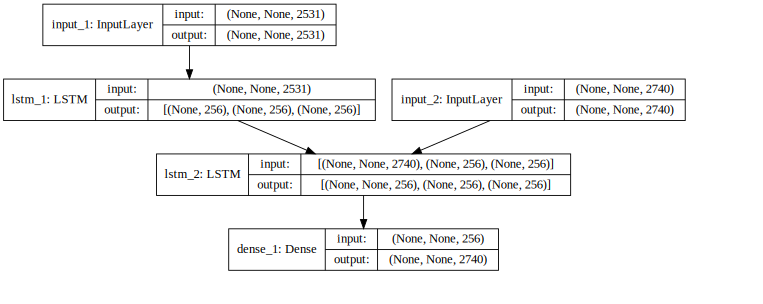

In [23]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [25]:
hist = model.fit(x=[encoder_input, decoder_input], y=decoder_output, batch_size=64, epochs=50, validation_split=.2, callbacks=[es])

Train on 2896 samples, validate on 725 samples
Epoch 1/50
2896/2896 [==============================] - 154s 53ms/step - loss: 0.9170 - acc: 0.9251 - val_loss: 0.5931 - val_acc: 0.9138
Epoch 2/50
2896/2896 [==============================] - 149s 51ms/step - loss: 0.3118 - acc: 0.9474 - val_loss: 0.6256 - val_acc: 0.9133
Epoch 3/50
2896/2896 [==============================] - 149s 51ms/step - loss: 0.3144 - acc: 0.9476 - val_loss: 0.5707 - val_acc: 0.9126
Epoch 4/50
2896/2896 [==============================] - 150s 52ms/step - loss: 0.2972 - acc: 0.9483 - val_loss: 0.6589 - val_acc: 0.9129
Epoch 5/50
2896/2896 [==============================] - 149s 51ms/step - loss: 0.2852 - acc: 0.9500 - val_loss: 0.5546 - val_acc: 0.9137
Epoch 6/50
2896/2896 [==============================] - 148s 51ms/step - loss: 0.2723 - acc: 0.9524 - val_loss: 0.5229 - val_acc: 0.9181
Epoch 7/50
2896/2896 [==============================] - 150s 52ms/step - loss: 0.2593 - acc: 0.9552 - val_loss: 0.5015 - val_acc: 0

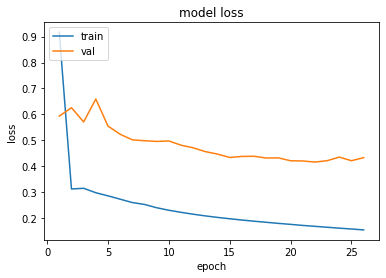

In [26]:
epochs = range(1, len(hist.history['val_loss']) + 1)
plt.plot(epochs, hist.history['loss'])
plt.plot(epochs, hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

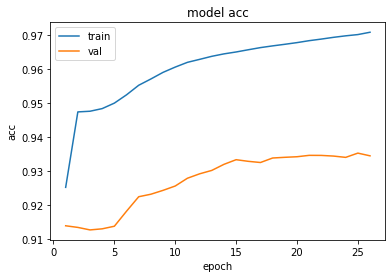

In [27]:
epochs = range(1, len(hist.history['val_acc']) + 1)
plt.plot(epochs, hist.history['acc'])
plt.plot(epochs, hist.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)

In [46]:
encoder_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 2531)        0         
_________________________________________________________________
lstm_1 (LSTM)                [(None, 256), (None, 256) 2854912   
Total params: 2,854,912
Trainable params: 2,854,912
Non-trainable params: 0
_________________________________________________________________


In [0]:
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)

decoder_states = [state_h, state_c]
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)

In [0]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)
    print(np.argmax(states_value,axis=1))
    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1, tar_size))
    target_seq[0, 0, tar_to_index['\t']] = 1.

    stop_condition = False
    decoded_sentence = ""

    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 문자로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]

        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += sampled_char

        # <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_tar_len):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1, 1, tar_size))
        target_seq[0, 0, sampled_token_index] = 1.

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence

In [45]:
import numpy as np
for seq_index in [3,1,10,28,1001]: # 입력 문장의 인덱스
    input_seq = encoder_input[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print(35 * "-")
    print('입력 문장:', data.src[seq_index])
    print('정답 문장:', kor_target[seq_index][1:len(kor_target[seq_index])-1]) # '\t'와 '\n'을 빼고 출력
    print('번역기가 번역한 문장:', decoded_sentence[:len(decoded_sentence)-1]) # '\n'을 빼고 출력

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0